In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

9


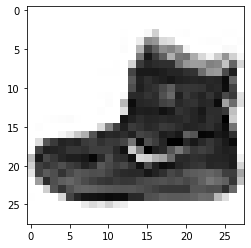

In [2]:
# print(train_images[0])
print(train_labels[0])
plt.imshow(train_images[0], cmap='Greys')
plt.show()

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot


In [3]:
# 훈련용 이미지 는 28x28 의 넘파이 어레이
print(train_images.shape)
# 훈련용 라벨은 0에서 9까지의 정수 값을 갖는 어레이입니다.
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# 2. 데이터 전처리
# 기존 0 , 255 사이의 흑백 데이터 값을 가지는값을 0.0 ~ 1.0 사이의
# 데이터를 가지도록 변환합니다
train_images, test_images = train_images / 255.0, test_images / 255.0


In [5]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    # input 으론 28x28 을가진 넘파이 어레이
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 히든레이어 노드의 수는 512개 
    tf.keras.layers.Dense(512, activation='relu'),
    # 아웃풋레이어 노드의수는 10가지로 분류
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=5)

model.save('Predict_Model(Fashin).h5')

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.9003
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2541 - accuracy: 0.9056
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2408 - accuracy: 0.9086
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2339 - accuracy: 0.9126
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2226 - accuracy: 0.9166


In [11]:
# 6. 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 0s 868us/step - loss: 0.3738 - accuracy: 0.8691
0.3738453984260559 0.8690999746322632


In [1]:
# 7. 예측하기
test_image = test_images[104]

plt.imshow(test_image, cmap='Greys')
plt.show()

predictions = model.predict(test_image)
print(predictions[0])
print(np.argmax(predictions[0]))

NameError: name 'test_images' is not defined